# **1.Importing needed packages and explain their uses in your code.**

In [1]:
# 1. Importing needed packages and explain their uses in your code.
import numpy as np  # for numerical operations
#Pandas offers data structure and operations for powerful, flexible, and easy-to-use data analysis and manipulation
import pandas as pd  # for data manipulation -
import matplotlib.pyplot as plt  # for data visualization
from sklearn.model_selection import train_test_split  # for data splitting
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # for feature scaling
from sklearn.svm import SVC  # for Support Vector Classifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report  # for evaluation
import seaborn as sns # Seaborn is a library for making statistical graphics in Python.
# Scikit-learn's DecisionTreeClassifier to build the decision tree model
from sklearn.tree import DecisionTreeClassifier
# Import the plot_tree function from sklearn.tree for visualizing decision tree models
from sklearn.tree import plot_tree
# Estimate Knn model and report the outcome :
from sklearn.neighbors import KNeighborsClassifier

# **2. Importing the selected dataset and Explore & visualizing the dataset contents.**  

In [2]:
# Load the dataset
# Define the column names based on adult.names file
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"]

# Load the testing data (adult.test), skipping the first row containing metadata
train_data = pd.read_csv(
    "/content/drive/MyDrive/ProjectML/adult.data",
    # Path to the file to be read (adult.test)
    header=None,                    # No header row in the file, as column names are not provided in the file
    names=column_names,             # Assign the custom column names to the DataFrame from the `column_names` list
    na_values=" ?",                 # Treat any occurrences of " ?" in the dataset as missing values (NaN)
    skipinitialspace=True,          # Ignore any extra spaces after delimiters (commas) when parsing the file
    skiprows=1                      # Skip the first row in the file (metadata like "|1x3 Cross validator")
)
# Load the testing data (adult.test), skipping the first row containing metadata
test_data = pd.read_csv(
    "/content/drive/MyDrive/ProjectML/adult.test",
    # Path to the file to be read (adult.test)
    header=None,                    # No header row in the file, as column names are not provided in the file
    names=column_names,             # Assign the custom column names to the DataFrame from the `column_names` list
    na_values=" ?",                 # Treat any occurrences of " ?" in the dataset as missing values (NaN)
    skipinitialspace=True,          # Ignore any extra spaces after delimiters (commas) when parsing the file
    skiprows=1                      # Skip the first row in the file (metadata like "|1x3 Cross validator")
)

# Check the results
print("Train Data count:")
print(train_data.shape[0])
print("\nTest Data count :")
print(test_data.shape[0])

Train Data count:
32560

Test Data count :
16281


In [3]:
# count if there are null value in cloulm
train_data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [4]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# replace ? value to null valu
train_data.replace('?', None, inplace=True)
test_data.replace('?', None, inplace=True)

# count if there are null value in cloulm
train_data.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


# **Explore Training Data**

In [6]:
# Display a summary of the DataFrame, including the data types of each column,
# the number of non-null values, and memory usage
train_data.info() # display dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
train_data.isna().sum() # count if there are null value in cloulm

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [8]:
# Count the occurrences of each class (<=50K, >50K) in the 'income' column
train_data.income.value_counts()

,count
income,
<=50K,24719
>50K,7841


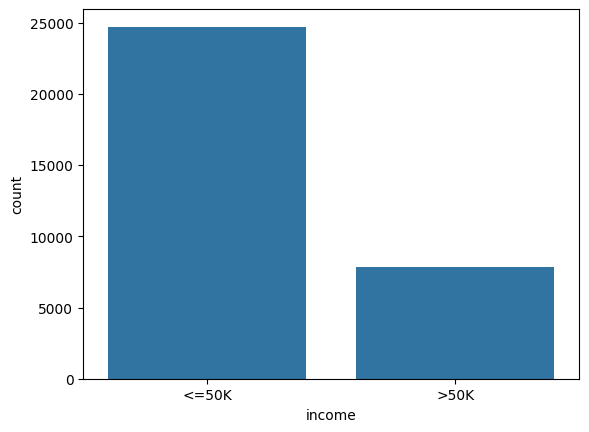

In [9]:
# Visualize stroke distribution
sns.countplot(x='income', data=train_data)
plt.show()

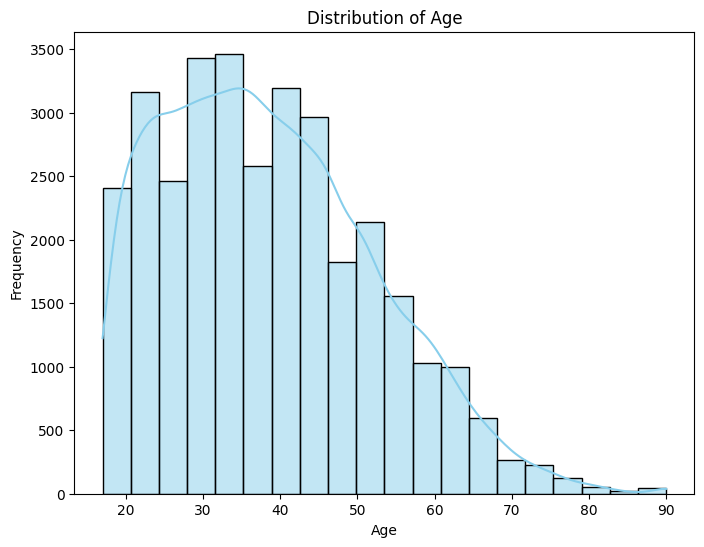

In [10]:
# Visualize age distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_data['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

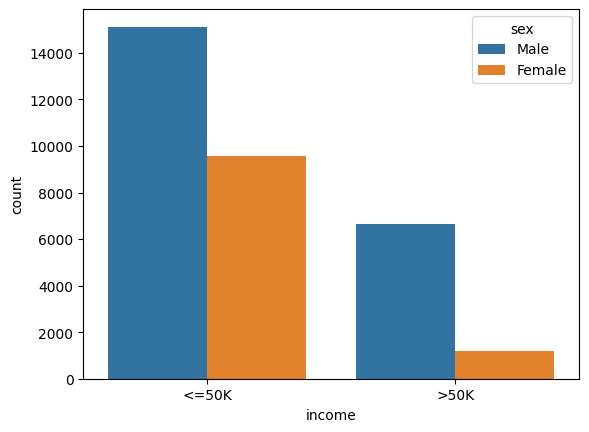

In [11]:
sns.countplot(x='income', hue='sex', data=train_data)
plt.show()

# Explore Testing Data =========================================

In [12]:
test_data.isna().sum() # count if there are null value in cloulm

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


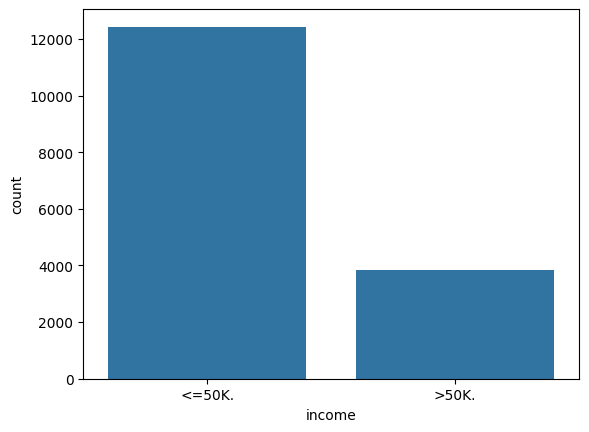

In [13]:
# Visualize income distribution
sns.countplot(x='income', data=test_data)
plt.show()

In [14]:
test_data['income'] = test_data['income'].replace('<=50K.', '<=50K')
test_data['income'] = test_data['income'].replace('>50K.', '>50K')

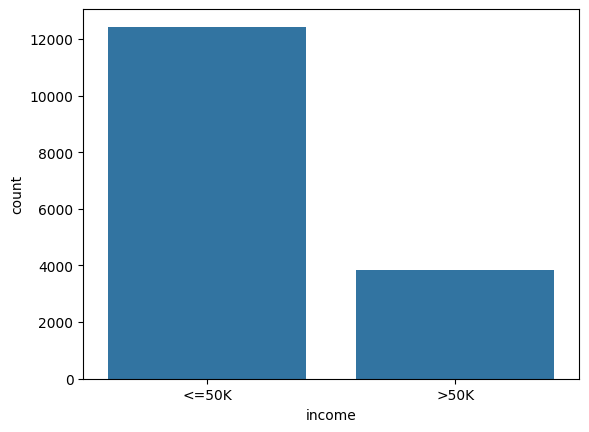

In [15]:
# Visualize income distribution
sns.countplot(x='income', data=test_data)
plt.show()

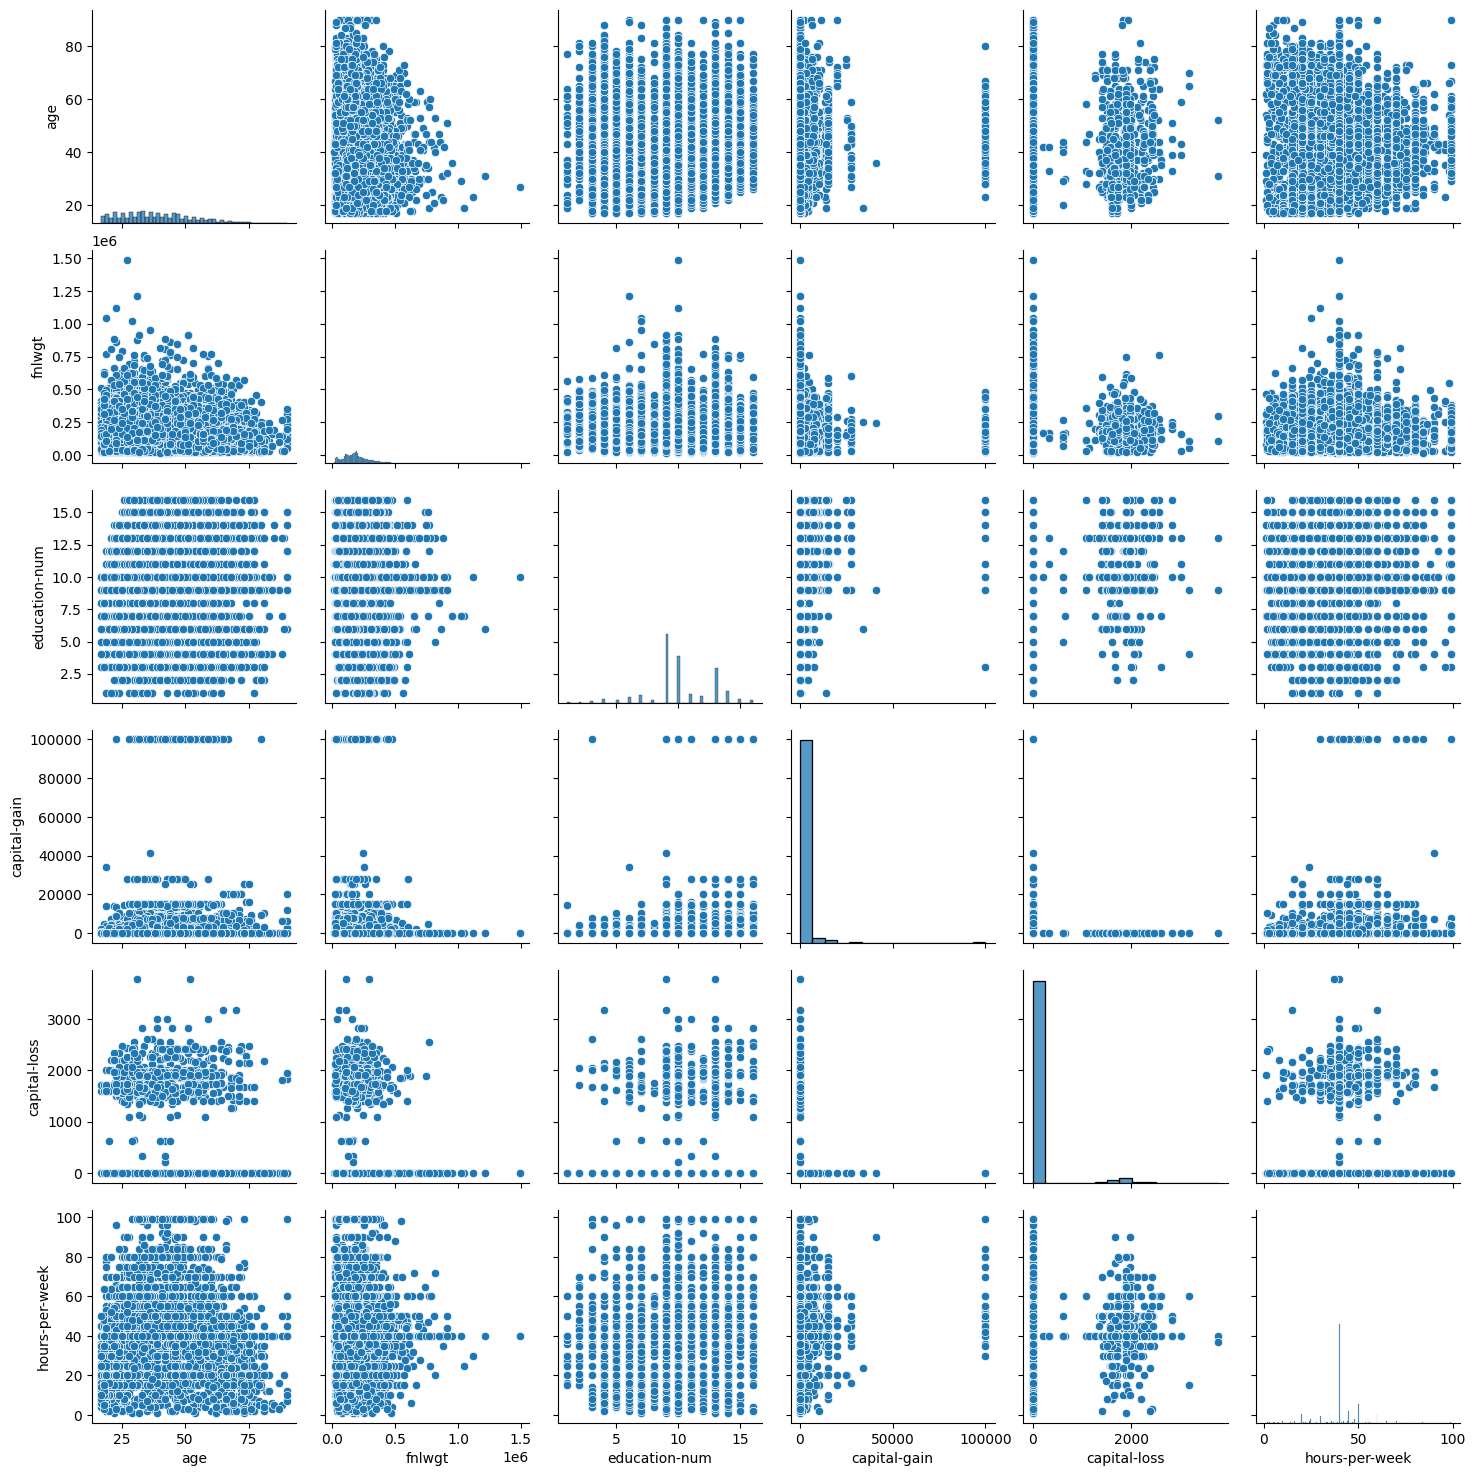

In [16]:
sns.pairplot(test_data)

Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column

# **Data Preprocessing**

In [17]:
# Assuming you have your training and test data in train_data and test_data
combined_data = pd.concat([train_data, test_data], ignore_index=True)
combined_data.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
combined_data.shape[0]


48841

In [19]:
combined_data.isna().sum() # count if there are null value in cloulm

,0
age,0
workclass,2799
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,2809
relationship,0
race,0
sex,0


# Fill Missing Values Based on the Most Frequent Category

**Handling Missing Values Before One-Hot Encoding (Recommended Approach)**
Impute Using the Mode (Most Frequent Value):

In [20]:
# Fill missing values in 'workclass' with the mode (most frequent value)
mode_value_workclass = combined_data['workclass'].mode()[0]
combined_data['workclass'] = combined_data['workclass'].fillna(mode_value_workclass)

# Fill missing values in 'occupation' with the mode (most frequent value)
mode_value_occupation = combined_data['occupation'].mode()[0]
combined_data['occupation'] = combined_data['occupation'].fillna(mode_value_occupation)

# Fill missing values in 'native-country' with the mode (most frequent value)
mode_value_native_country = combined_data['native-country'].mode()[0]
combined_data['native-country'] = combined_data['native-country'].fillna(mode_value_native_country)


In [21]:
combined_data.isna().sum() # count if there are null value in cloulm

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [22]:
combined_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48837,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# **Encoding Categorical Variables**


In [23]:
#One Hot Encoding Categorical Variables
#get all categorical columns
cat_columns = combined_data.select_dtypes(['object']).columns

#convert all categorical columns to numeric
combined_data[cat_columns] = combined_data[cat_columns].apply(lambda x: pd.factorize(x)[0])

#print head of data after convert
combined_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,0,83311,0,13,0,0,0,0,0,0,0,13,0,0
1,38,1,215646,1,9,1,1,1,0,0,0,0,40,0,0
2,53,1,234721,2,7,0,1,0,1,0,0,0,40,0,0
3,28,1,338409,0,13,0,2,2,1,1,0,0,40,1,0
4,37,1,284582,3,14,0,0,2,0,1,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,1,215419,0,13,1,2,1,0,1,0,0,36,0,0
48837,64,1,321403,1,9,6,2,5,1,0,0,0,40,0,0
48838,38,1,374983,0,13,0,2,0,0,0,0,0,50,0,0
48839,44,1,83891,0,13,1,4,3,2,0,5455,0,40,0,0


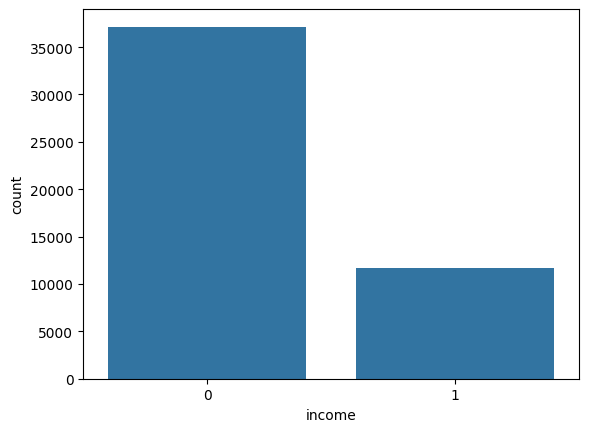

In [24]:
# Visualize income distribution
sns.countplot(x='income', data=combined_data)
plt.show()

# Optional Steps:

 Applying Normalization to the Adult Income Dataset



In [25]:
# Separate features and target
X_combined_data = combined_data.drop('income', axis=1)
y_combined_data = combined_data['income']

# Apply Min-Max Normalization to features
scaler = MinMaxScaler()
X_combined_data_normalized = scaler.fit_transform(X_combined_data)


# Convert back to DataFrame for better readability
combined_data= pd.DataFrame(X_combined_data_normalized, columns=X_combined_data.columns)

combined_data =combined_data.join(y_combined_data)

combined_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.452055,0.000000,0.048052,0.000000,0.800000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.122449,0.000,0
1,0.287671,0.142857,0.137581,0.066667,0.533333,0.166667,0.076923,0.2,0.00,0.0,0.000000,0.0,0.397959,0.000,0
2,0.493151,0.142857,0.150486,0.133333,0.400000,0.000000,0.076923,0.0,0.25,0.0,0.000000,0.0,0.397959,0.000,0
3,0.150685,0.142857,0.220635,0.000000,0.800000,0.000000,0.153846,0.4,0.25,1.0,0.000000,0.0,0.397959,0.025,0
4,0.273973,0.142857,0.184219,0.200000,0.866667,0.000000,0.000000,0.4,0.00,1.0,0.000000,0.0,0.397959,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0.301370,0.142857,0.137428,0.000000,0.800000,0.166667,0.153846,0.2,0.00,1.0,0.000000,0.0,0.357143,0.000,0
48837,0.643836,0.142857,0.209130,0.066667,0.533333,1.000000,0.153846,1.0,0.25,0.0,0.000000,0.0,0.397959,0.000,0
48838,0.287671,0.142857,0.245379,0.000000,0.800000,0.000000,0.153846,0.0,0.00,0.0,0.000000,0.0,0.500000,0.000,0
48839,0.369863,0.142857,0.048444,0.000000,0.800000,0.166667,0.307692,0.6,0.50,0.0,0.054551,0.0,0.397959,0.000,0


# **3. Splitting the dataset into train, test dataset & Feature Scaling**

In [26]:
#2. Separate the Combined Data Back Into Train and Test
# Get the original number of rows for the training data
train_size = len(train_data)

# Separate the combined data back into train and test sets
train_data_separated = combined_data.iloc[:train_size]
test_data_separated = combined_data.iloc[train_size:]

# Check the results
print("Train Data Separated:")
print(train_data_separated.shape[0])
print("\nTest Data Separated:")
print(test_data_separated.shape[0])

Train Data Separated:
32560

Test Data Separated:
16281


In [27]:
# Separate features and target
X_train = train_data_separated.drop('income', axis=1)
y_train = train_data_separated['income']
X_test = test_data_separated.drop('income', axis=1)
y_test = test_data_separated['income']

y_train.head(2)

,income
0,0
1,0


# **4. Setting up the selected SVM ML model.**

In [28]:
# Initialize the SVM classifier with default parameters
SVM_classifier = SVC()

# Alternatively, you can specify the kernel explicitly (default is 'rbf')
# classifier = SVC(kernel='rbf')
SVM_classifier = SVC(kernel='rbf', random_state=0)  # initialize SVM classifier

# You can also specify other parameters such as C, gamma, etc., but for now, let's use the defaults
# Print the default parameters of the SVM classifier
print("Default parameters of SVM classifier:")
print(SVM_classifier.get_params())


Default parameters of SVM classifier:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}


**Training the SVM ML model with your dataset.**

In [29]:
# Assuming X_train and y_train are your training features and labels, respectively
# Also 'classifier' is the initialized SVM classifier

# Train the SVM classifier on the training data
SVM_classifier.fit(X_train, y_train)

# Once training is complete, the model is ready to make predictions

SVC(random_state=0)

**Testing and evaluating the trained SVM ML model(s) against the test dataset and report the result visually.**

Accuracy: 0.8485351022664456


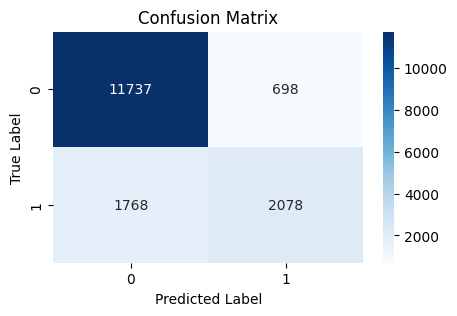

In [30]:
# Make predictions on the test data
y_pred_svm = SVM_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
# Evaluating the model
print(confusion_matrix(y_test, y_pred_svm))  # confusion matrix
print("**********************************")
print(classification_report(y_test, y_pred_svm))  # classification report

[[11737   698]
 [ 1768  2078]]
**********************************
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12435
           1       0.75      0.54      0.63      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.74      0.77     16281
weighted avg       0.84      0.85      0.84     16281



Based on the provided classification report:

*    **Precision**: Precision measures the proportion of true positive predictions out of all positive predictions. For class 0, the precision is 0.87, indicating that 87% of the instances predicted as class 0 are actually class 0. For class 1, the precision is 0.95, meaning that 95% of the instances predicted as class 1 are actually class 1. Higher precision values indicate better performance in correctly identifying instances of the respective class.

*    **Recall**: Recall measures the proportion of true positive predictions out of all actual positive instances. For class 0, the recall is 0.94, suggesting that 94% of the actual class 0 instances are correctly identified by the model. For class 1, the recall is 0.68, indicating that 68% of the actual class 1 instances are correctly identified by the model. Higher recall values imply better performance in capturing instances of the respective class.

*    **F1-score**: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. It ranges from 0 to 1, with higher values indicating better overall performance. For class 0, the F1-score is 0.90, and for class 1, it is 0.79.

*    **Accuracy**: Accuracy measures the overall proportion of correctly predicted instances out of the total instances. In this case, the accuracy is 0.84, indicating that 84% of the instances are correctly classified by the model.

*    **Support**: Support represents the number of actual occurrences of each class in the test dataset. It provides context for the precision, recall, and F1-score values.

**Overall:**

*  The model achieved an accuracy of 84%, meaning that 84% of all instances were correctly classified.
*  The macro average for precision, recall, and F1-score indicates an average performance across both classes, with precision and recall slightly higher for class 0 compared to class 1.
*  The weighted average takes class imbalance into account, providing a more representative measure of overall model performance across both classes.


In summary, the model achieves high precision and recall for class 0 (indicating good performance in identifying instances of class 0), while for class 1, the recall is relatively lower, indicating that some instances of class 1 may be missed by the model. Overall, the model demonstrates good performance with an accuracy of 84%, but further analysis may be needed to understand the trade-offs between precision and recall for different classes and to identify potential areas for improvement.

# **5. Setting up the Decision tree classifier model**
Let's create a decision tree classifier model and train using Entropy as shown below:

In [32]:
# perform training with entropy
# Decision tree with entropy
DTree_clf = DecisionTreeClassifier(criterion = "entropy", random_state = 42,max_depth = 3, min_samples_leaf = 5)
# Fit the model
DTree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

**Decision Tree Model Prediction and Performance Assessment**


In [33]:
# Predictions on the test set
y_pred_DT = DTree_clf.predict(X_test)

# Confusion matrix and performance metrics
cm = confusion_matrix(y_test, y_pred_DT)
accuracy = accuracy_score(y_test, y_pred_DT)
report = classification_report(y_test, y_pred_DT)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Confusion Matrix:
 [[11803   632]
 [ 1895  1951]]
Accuracy: 0.8447884036607088
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     12435
           1       0.76      0.51      0.61      3846

    accuracy                           0.84     16281
   macro avg       0.81      0.73      0.76     16281
weighted avg       0.84      0.84      0.83     16281



Accuracy: 0.8447884036607088


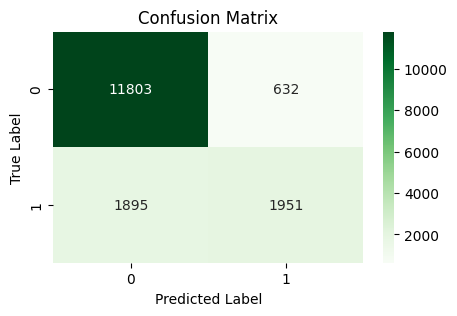

In [34]:
# Make predictions on the test data
y_pred_DT = DTree_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_DT)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_DT)

# Plot confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Visual Representation of the Decision Tree Model**

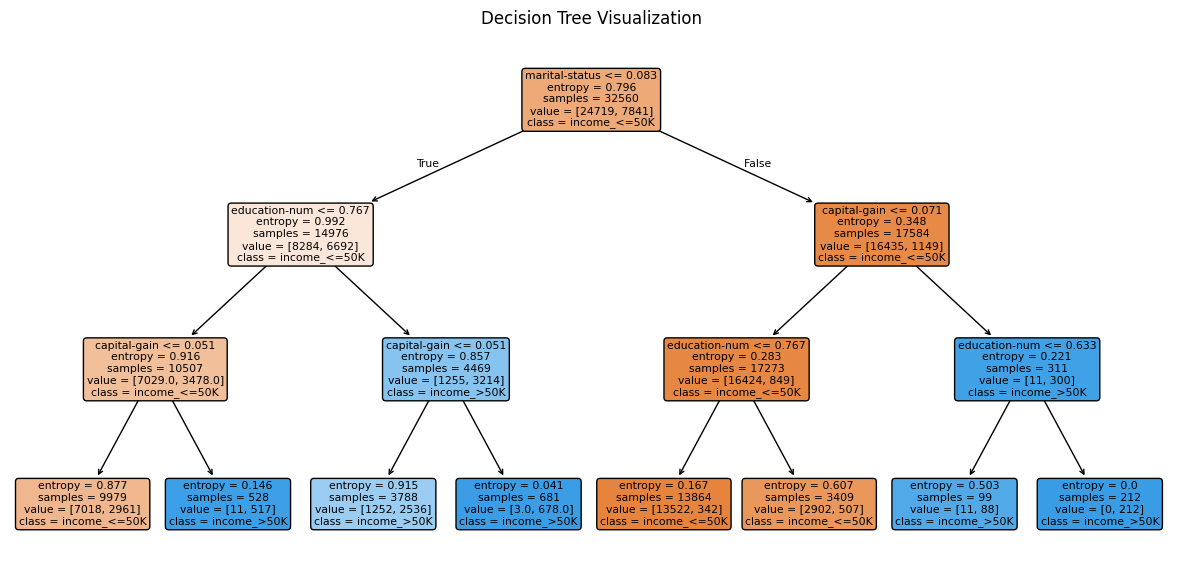

In [35]:
# Plot the decision tree
plt.figure(figsize=(15, 7))  # Adjust the size as needed
plot_tree(DTree_clf, feature_names=X_train.columns, class_names=['income_<=50K', 'income_>50K'], filled=True, rounded=True)

# Add title
plt.title('Decision Tree Visualization')

# Display the plot
plt.show()

# **6. Setting up the KNN classifier model**

In [36]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [37]:
# Predictions on the test set
y_pred_knn = knn.predict(X_test)

# Confusion matrix and performance metrics
cm = confusion_matrix(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Confusion Matrix:
 [[11290  1145]
 [ 1631  2215]]
Accuracy: 0.8294945027946686
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     12435
           1       0.66      0.58      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.74      0.75     16281
weighted avg       0.82      0.83      0.83     16281



Accuracy: 0.8294945027946686


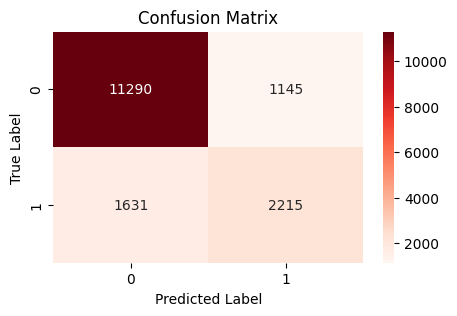

In [38]:
# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()